In [45]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
import ast
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings(action='ignore')

In [2]:
baby_df = pd.read_csv("./babyInfo.csv")
# 데이터 불러오기

In [3]:
baby_growth_df = baby_df.dropna(subset=['growth','gender']) 
# growth, gender 결측치 제거

In [4]:
baby_growth_df['growth'] = baby_growth_df['growth'].apply(ast.literal_eval) 
# 문자열 -> 딕셔너리 형태로 변환
baby_growth_df['height'] = baby_growth_df['growth'].apply(lambda x: x.get('height', {}).get('value', None))
baby_growth_df['weight'] = baby_growth_df['growth'].apply(lambda x: x.get('weight', {}).get('value', None))

In [5]:
baby_growth_df[baby_growth_df['weight'].isna() & baby_growth_df['height'].isna()] 
# height,weight 둘 다 결측치인 행 확인

,_id,days,desc,gender,__v,growth,height,weight
2239,63490ebc4f30a39628aefdc9,19,어찌저찌 어제보다는 오늘 한결 수월하다!\n그래도 할일은 너무 많고\n너가 울면 어...,M,0,"{'head': {'value': 37, 'unit': 'cm', 'std': 37}}",NaN,NaN
6393,63a96fee0ec395c9ce32feb3,54,NaN,M,0,"{'head': {'value': 39, 'unit': 'cm', 'std': 39}}",NaN,NaN
9350,6325346f204f507df3e5a1b3,78,78일차 아가 성장표\n\n🎀모빌도 좋아하지만 이제는 아기체육관을 더 좋아함\n🎀잘...,F,0,"{'head': {'value': 41, 'unit': 'cm', 'std': 41}}",NaN,NaN
9414,638bd1daffe5f9567ae18982,79,🤎11시간 통잠 4일차 \n🤎밤잠 시작 시간을 7:30pm으로 본인이 정한 듯함\n...,F,0,"{'head': {'value': 39, 'unit': 'cm', 'std': 39}}",NaN,NaN
9920,63639f4e7382e0031c9b5560,83,NaN,M,0,"{'head': {'value': 39.6, 'unit': 'cm', 'std': ...",NaN,NaN
...,...,...,...,...,...,...,...,...
223985,590c7241b9ede03a5c586eb9,131,NaN,M,0,"{'head': {'std': 43, 'value': 43, 'unit': 'cm'}}",NaN,NaN
224346,61080e04babd662a6282d83c,132,NaN,M,0,"{'head': {'value': 42.5, 'unit': 'cm', 'std': ...",NaN,NaN
225178,59bfb0b41787fa4328598fe9,132,NaN,M,0,"{'head': {'unit': 'cm', 'value': 43, 'std': 43}}",NaN,NaN
226391,5a1cb41c01a81b7476aa0877,133,NaN,M,0,"{'head': {'value': 42.9, 'unit': 'cm', 'std': ...",NaN,NaN


In [6]:
baby_growth_df = baby_growth_df.dropna(axis='index', how='all', subset=['height','weight']) 
# 둘 다 결측치인 행 제거

In [7]:
baby_growth_df = baby_growth_df[baby_growth_df['gender'] != 'U'] 
# 성별이 Unknown인 행 삭제

In [8]:
# 'gender' column 추출
gender = baby_growth_df['gender']

# 'gender' column을 one-hot 인코딩하여 새로운 데이터프레임 생성
gender_onehot = pd.get_dummies(gender, prefix='gender')

# 원래 데이터프레임과 합치기
baby_growth_df = pd.concat([baby_growth_df, gender_onehot], axis=1)

# 'gender' column 삭제
baby_growth_df = baby_growth_df.drop('gender', axis=1)

In [9]:
baby_growth_df.sort_values(by='days', inplace=True) # 생후 개월 수로 오름차순 정렬

In [10]:
baby_growth_df['days'] = pd.to_numeric(baby_growth_df['days'])

In [11]:
male_df = baby_growth_df[baby_growth_df['gender_M']==1].copy()
female_df = baby_growth_df[baby_growth_df['gender_F']==1].copy()

In [12]:
male_df.drop(['gender_F'], axis=1, inplace=True)

In [13]:
female_df.drop(['gender_M'], axis=1, inplace=True)

## 결측치 처리

In [14]:
#imputer = KNNImputer(n_neighbors=5)

In [15]:
# male_df에서 height 칼럼의 결측치 처리
"""
male_df_height = male_df['height'].values.reshape(-1, 1)
imputed_male_df_height = imputer.fit_transform(male_df_height)
male_df['height'] = imputed_male_df_height

# female_df에서 height 칼럼의 결측치 처리
female_df_height = female_df['height'].values.reshape(-1, 1)
imputed_female_df_height = imputer.fit_transform(female_df_height)
female_df['height'] = imputed_female_df_height"""

"\nmale_df_height = male_df['height'].values.reshape(-1, 1)\nimputed_male_df_height = imputer.fit_transform(male_df_height)\nmale_df['height'] = imputed_male_df_height\n\n# female_df에서 height 칼럼의 결측치 처리\nfemale_df_height = female_df['height'].values.reshape(-1, 1)\nimputed_female_df_height = imputer.fit_transform(female_df_height)\nfemale_df['height'] = imputed_female_df_height"

In [16]:
"""# male_df에서 weight 칼럼의 결측치 처리
male_df_weight = male_df['weight'].values.reshape(-1, 1)
imputed_male_df_weight = imputer.fit_transform(male_df_weight)
male_df['weight'] = imputed_male_df_weight

# female_df에서 weight 칼럼의 결측치 처리
female_df_weight = female_df['weight'].values.reshape(-1, 1)
imputed_female_df_weight = imputer.fit_transform(female_df_height)
female_df['weight'] = imputed_female_df_weight"""

"# male_df에서 weight 칼럼의 결측치 처리\nmale_df_weight = male_df['weight'].values.reshape(-1, 1)\nimputed_male_df_weight = imputer.fit_transform(male_df_weight)\nmale_df['weight'] = imputed_male_df_weight\n\n# female_df에서 weight 칼럼의 결측치 처리\nfemale_df_weight = female_df['weight'].values.reshape(-1, 1)\nimputed_female_df_weight = imputer.fit_transform(female_df_height)\nfemale_df['weight'] = imputed_female_df_weight"

In [17]:
male_df['height'] = male_df.groupby('days')['height'].transform(lambda x: x.fillna(x.median()))
male_df['weight'] = male_df.groupby('days')['weight'].transform(lambda x: x.fillna(x.median()))
female_df['height'] = female_df.groupby('days')['height'].transform(lambda x: x.fillna(x.median()))
female_df['weight'] = female_df.groupby('days')['weight'].transform(lambda x: x.fillna(x.median()))

In [18]:
# 이상치 제거 함수
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df = df.loc[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [19]:
# 남성 생후 일 수 별로 그룹화
grouped_male = male_df.groupby('days')

# 각 생후 일 수별로 이상치 제거된 데이터프레임을 저장할 빈 데이터프레임 생성
cleaned_df_male = pd.DataFrame(columns=male_df.columns)

# 생후 일 수(days)별로 이상치 제거된 데이터를 cleaned_df_male에 추가
for name, group in grouped_male:
    group = remove_outliers(group, 'height')
    group = remove_outliers(group, 'weight')
    cleaned_df_male = pd.concat([cleaned_df_male, group])


In [20]:
# 여성 생후 일 수 별로 그룹화
grouped_female = female_df.groupby('days')

# 각 생후 일 수별로 이상치 제거된 데이터프레임을 저장할 빈 데이터프레임 생성
cleaned_df_female = pd.DataFrame(columns=female_df.columns)

# 생후 일 수(days)별로 이상치 제거된 데이터를 cleaned_df_female에 추가
for name, group in grouped_female:
    group = remove_outliers(group, 'height')
    group = remove_outliers(group, 'weight')
    cleaned_df_female = pd.concat([cleaned_df_female, group])


In [21]:
baby_growth_df = pd.concat([cleaned_df_male, cleaned_df_female], ignore_index=True)

In [22]:
baby_growth_df['gender_F'].fillna(0, inplace=True)
baby_growth_df['gender_M'].fillna(0, inplace=True)

In [23]:
baby_growth_df['gender'] = 0
baby_growth_df.loc[baby_growth_df['gender_M'] == True, 'gender'] = 1

In [24]:
baby_growth_df.drop(['gender_M', 'gender_F'], axis = 1, inplace = True)

In [25]:
baby_growth_df.drop(['_id', 'desc', '__v', 'growth'], axis = 1, inplace = True)

In [26]:
baby_growth_df.to_csv("filename.csv", mode='w')

## 현재 성장정도 예측

In [27]:
import pandas as pd
import numpy as np
import ast

In [28]:
baby_growth_df = pd.read_csv("./baby_growth_df.csv")

In [48]:
input_gender, input_days, input_height, input_weight = map(float, input().split(','))
# Male(남자) = 1, Female(여자) = 0

1.0, 15.0, 55.1, 4.8


In [49]:
compare_df = baby_growth_df[(baby_growth_df['gender'] == input_gender) 
                            & (baby_growth_df['days'] == input_days)]
# 생후일수와 성별이 동일한 아이들의 집합 데이터프레임

In [50]:
height_rank = (compare_df['height'] > input_height).sum() + 1
weight_rank = (compare_df['weight'] > input_weight).sum() + 1

height_percent = height_rank/len(compare_df)
weight_percent = weight_rank/len(compare_df)

In [51]:
print("아이의 신장은 상위 %.2f%% 입니다." %height_percent)
print("아이의 체중은 상위 %.2f%% 입니다." %weight_percent)

if 0 <= input_days <= 30 :
    print("BCG 접종")
    print("B형 간염")
elif 30 < input_days <= 60 :
    print("B형 간염")
elif 60 < input_days <= 90 : # 2개월
    print("DTap 접종")
    print("폴리오 접종")
    print("뇌수막염")
    print("폐렴구균")
    print("로티바이러스(로타릭스)")
    print("로타바이러스(로타텍)")
elif 120 < input_days <= 150 : # 4개월
    print("DTaP")
    print("폴리오")
    print("뇌수막염")
    print("폐렴구균")
    print("로티바이러스(로타릭스)")
    print("로타바이러스(로타텍)")
elif 180 < input_days <= 210 :
    print("B형 간염")
    print("폴리오")
    print("뇌수막염")
    print("폐렴구균")
    print("로타바이러스(로타텍)")
elif 330 <= input_days <= 360 : 
    print("MMR 접종")
    print("수두 접종")
    print("일본뇌염(사백신)")
    print("일본뇌염(생백신)")
    print("뇌수막염")
    print("폐렴구균")
    print("A형 간염")
else :
    print("예방 접종 기간 아닙니다.")

아이의 신장은 상위 0.00% 입니다.
아이의 체중은 상위 0.00% 입니다.
BCG 접종
B형 간염


In [52]:
std_height_male = [49.9, 54.7, 58.4, 61.4, 63.9, 65.9, 67.6, 69.2, 70.6, 72.0, 73.3, 74.5, 75.7]

std_height_female = [49.1, 53.7, 57.1, 59.8, 62.1, 64.0, 65.7, 67.3, 68.7, 70.1, 71.5, 72.8, 74.0]

std_weight_male = [3.3, 4.5, 5.6, 6.4, 7.0, 7.5, 7.9, 8.3, 8.6, 8.9, 9.2, 9.4, 9.6]

std_weight_female = [3.2, 4.2, 5.1, 5.8, 6.4, 6.9, 7.3, 7.6, 7.9, 8.2, 8.5, 8.7, 8.9]

In [53]:
def match_std_month(days) :
    if 0 <= days < 30 :
        return 0
    elif 30 <= days < 60 :
        return 1
    elif 60 <= days < 90 :
        return 2
    elif 90 <= days < 120 :
        return 3
    elif 120 <= days < 150 :
        return 4
    elif 150 <= days < 180 :
        return 5
    elif 180 <= days < 210 :
        return 6
    elif 210 <= days < 240 :
        return 7
    elif 240 <= days < 270 :
        return 8
    elif 270 <= days < 300 :
        return 9
    elif 300 <= days < 330 :
        return 10
    elif 330 <= days < 360 :
        return 11
    else :
        return 12

In [54]:
if input_gender == 0 :
    plot_std_height = std_height_female[match_std_month(input_days)]
    plot_std_weight = std_weight_female[match_std_month(input_days)]
    plot_data_mean_height = compare_df['height'].mean()
    plot_data_mean_weight = compare_df['weight'].mean()
if input_gender == 1 :
    plot_std_height = std_height_male[match_std_month(input_days)]
    plot_std_weight = std_weight_male[match_std_month(input_days)]
    plot_data_mean_height = compare_df['height'].mean()
    plot_data_mean_weight = compare_df['weight'].mean()

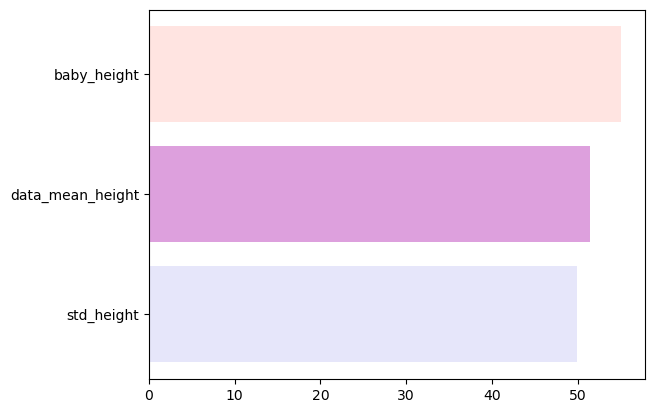

In [69]:
height_x = ['std_height', 'data_mean_height', 'baby_height']
height_y = [plot_std_height, plot_data_mean_height, input_height]
plt.barh(height_x, height_y, color=['lavender', 'plum', 'mistyrose'])
plt.show()

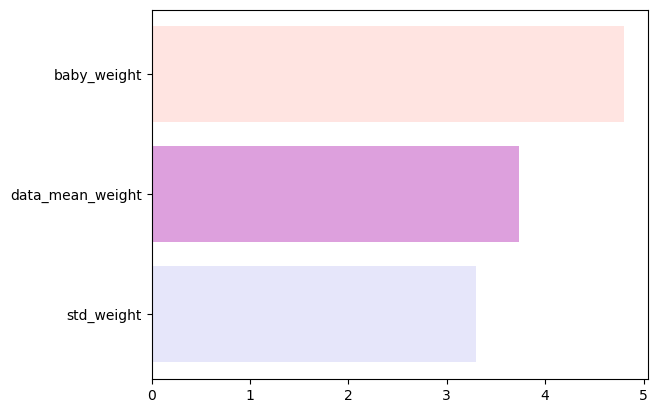

In [70]:
weight_x = ['std_weight', 'data_mean_weight', 'baby_weight']
weight_y = [plot_std_weight, plot_data_mean_weight, input_weight]
plt.barh(weight_x, weight_y, color=['lavender', 'plum', 'mistyrose'])
plt.show()

In [61]:
def check_obesity(day, weight) :
    if 0 <= day < 75 :
        if weight > 3.6 :
            print("소아비만")
    elif 75 <= day < 165 :
        if weight > 5.8 :
            print("소아비만")
    elif 165 <= day < 255 :
        if weight > 9.15 :
            print("소아비만")
    elif 255 <= day < 375 :
        if weight > 10.5 :
            print("소아비만")

In [62]:
check_obesity(input_days, input_weight)

소아비만
